<a href="https://colab.research.google.com/github/khbae/trading/blob/master/02_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."
* https://pandas.pydata.org/

The ** pandas ** package is a package for handling data frames and time series data. Along with the array of ** numpy ** packages, we can use it to perform regression analysis or various financial analyzes.

In [0]:
# import numpy and pandas
import numpy as np
import pandas as pd


## Series

Variables used in pandas consist of **series** and **dataframe**.
* series: a column vector
* dataframe: a set of column vectors

In [0]:
## Series sample
series1 = pd.Series(np.random.rand(10),name = 'series1')
type(series1)

pandas.core.series.Series

In [0]:
# Vector multiplied by a constant
series1 * 1000

0    526.702345
1    762.508206
2    649.948895
3     87.457818
4     52.172189
5     85.358301
6    255.304527
7    170.220300
8    516.110560
9    597.350451
Name: series1, dtype: float64

In [0]:
# Summary Statistics
series1.describe()

count    10.000000
mean      0.370313
std       0.267698
min       0.052172
25%       0.108148
50%       0.385708
75%       0.579688
max       0.762508
Name: series1, dtype: float64

In [0]:
# Assign row names 
series1.index = ['a','b','c','d','e','f','g','h','i','j']
series1

a    0.526702
b    0.762508
c    0.649949
d    0.087458
e    0.052172
f    0.085358
g    0.255305
h    0.170220
i    0.516111
j    0.597350
Name: series1, dtype: float64

In [0]:
# Show index in series
series1.index

Index([u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j'], dtype='object')

In [0]:
# Choose data
print(series1['g'])
print(series1[6])

0.2553045273793483
0.2553045273793483


## dataframe

A data frame can be said to be a combination of series, and has independent characteristics for each column.

In [0]:
# Create dict 
dict1 = {
    'column1' : [1,2,3,4,5],
    'column2' : ['amazon','ms','apple','google','samsung'],
    'returns' : np.random.rand(5)
}
type(dict1)

dict

In [0]:
# Convert Dict to dataframe
dfram = pd.DataFrame(dict1,pd.date_range('2015-01-01',periods=5))
dfram


,column1,column2,returns
2015-01-01,1,amazon,0.855540
2015-01-02,2,ms,0.319923
2015-01-03,3,apple,0.201074
2015-01-04,4,google,0.079964
2015-01-05,5,samsung,0.534425


In [0]:
# data frame columns and index
dfram.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

dataframe을 인덱싱하는 함수로는 iloc가 있고, 각 행좌표와 열좌표를 인자로 한다.

In [0]:
# iloc
dfram.iloc[1:3,0:3]


,column1,column2,returns
2015-01-02,2,ms,0.319923
2015-01-03,3,apple,0.201074


**dataframe**을 또 다른 인덱싱하는 함수로는 loc가 있고, 각 행이름과 열이름를 인자로 한다.

In [0]:
# use to_datetime function
dfram.loc[pd.to_datetime(['2015-01-01','2015-01-03']),['column1','column2']]

,column1,column2
2015-01-01,1,amazon
2015-01-03,3,apple


In [0]:
# Combine Series : pd.concat function
series1 = pd.Series(np.random.rand(10),name = 'series1')
series2 = pd.Series(np.random.rand(10),name = 'series2')
series3 = pd.Series(np.random.rand(10),name = 'series3')
dfram2 = pd.concat([series1,series2,series3],axis=1)
dfram2

,series1,series2,series3
0,0.401753,0.771322,0.402925
1,0.625604,0.522752,0.511941
2,0.309656,0.987667,0.322756
3,0.231585,0.779915,0.109179
4,0.227246,0.638261,0.235523
5,0.734185,0.715346,0.968700
6,0.988692,0.506206,0.436897
7,0.627060,0.309324,0.124718
8,0.141346,0.004172,0.725910
9,0.895795,0.562492,0.880470


**dataframe**을 직접 웹에서 받아오는 방법도 존재한다. 웹에서 받는 경우는 야후 파이낸스에서 데이터를 가져오는 경우와, quandl에서 가져오는 경우로 나뉜다.

In [0]:
!pip install -q pandas_datareader # pandas_datareader 패키지를 인스톨 하는 코드이다.

import pandas_datareader.data as web
import datetime # 원하는 날짜를 형성하여 만들 수 가 있다.

start = datetime.datetime(2017, 10, 19)
end = datetime.datetime(2017, 11, 1)

aapl = web.DataReader('AAPL','google',start,end)
aapl

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-19,156.75,157.08,155.02,155.98,42584166
2017-10-20,156.61,157.75,155.96,156.25,23974146
2017-10-23,156.89,157.69,155.50,156.17,21984327
2017-10-24,156.29,157.42,156.20,157.10,17757230
2017-10-25,156.91,157.55,155.27,156.41,21207098
2017-10-26,157.23,157.83,156.78,157.41,17000469
2017-10-27,159.29,163.60,158.70,163.05,44454160
2017-10-30,163.89,168.07,163.72,166.72,44700772
2017-10-31,167.90,169.65,166.94,169.04,36046828


In [0]:
!pip install -q quandl # quandl 패키지를 인스톨 하는 코드이다.

import quandl

# qunadl.get(qunadl_data_code, periods, api_key) 
# quandl에서 데이터를 받는 코드는 데이터 코드, 기간, 회원가입시 발급받을 수 있는 개인 api_key로 이루어진다. [ https://www.quandl.com/ ]

data = quandl.get("BCHARTS/BITSTAMPUSD",start_date="2017-12-01", end_date="2017-12-31") # 이 데이터는 api_key가 필요없이 받아올 수 있다.
data


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2017-12-01,9927.29,10949.89,9370.11,10840.45,16708.032248,1.718818e+08,10287.373047
2017-12-02,10840.45,11200.00,10637.69,10872.00,9267.161055,1.012701e+08,10927.843358
2017-12-03,10875.68,11800.01,10513.16,11250.00,14238.525877,1.601763e+08,11249.499550
2017-12-04,11250.00,11613.07,10850.00,11613.07,13621.481973,1.541229e+08,11314.695288
2017-12-05,11613.07,11850.00,11384.25,11677.00,11875.033777,1.383701e+08,11652.183797
2017-12-06,11676.99,13700.00,11659.80,13623.50,19784.873487,2.505608e+08,12664.260424
2017-12-07,13623.00,16615.62,13085.90,16599.99,25787.676556,3.826940e+08,14840.190945
2017-12-08,16599.99,16666.66,13482.42,15800.00,25473.395311,3.893660e+08,15285.203654
2017-12-09,15799.87,15998.50,12701.05,14607.49,16587.472927,2.389091e+08,14402.981914


Text(0,0.5,u'ylabel Here ZZZ')

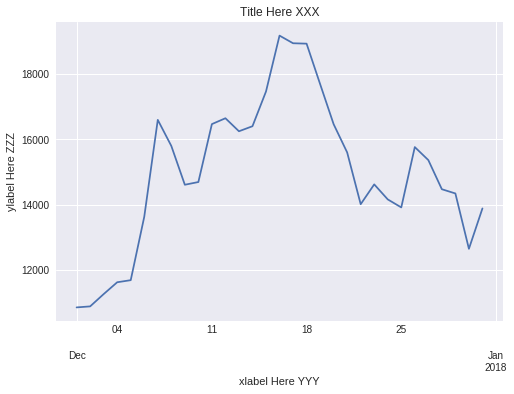

In [0]:
# Plot graph. Set title, xlabel, ylabel and xlim
type(data)
ax = data['Close'].plot()
ax.set_title('Title Here XXX')
ax.set_xlabel('xlabel Here YYY')
ax.set_ylabel('ylabel Here ZZZ')

In [0]:
# Simple Linear Regression: scipy, stats, linregress
from scipy import stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(data['Volume (BTC)'],data['Close'])
print(slope)
print(stderr)
print(slope/stderr)

0.003256020572302811
0.04845960858779708
0.06719040180449848
